In [ ]:
!pip install networkx
!pip install EoN

In [3]:
import networkx as nx
import os
import csv
import EoN
import matplotlib.pyplot as plt

In [4]:
G = nx.Graph()

In [5]:
edges_dataset_path = os.path.join('..', 'Datasets', '2022 PROJECT TOPIC Air Transportation Network Analysis', 'Air transportation network', 'edges.csv')
nodes_dataset_path = os.path.join('..', 'Datasets', '2022 PROJECT TOPIC Air Transportation Network Analysis', 'Air transportation network', 'nodes.csv')

In [6]:
airline_network_edges = open(edges_dataset_path, 'rb')
G = nx.read_edgelist(airline_network_edges, delimiter=',')

In [7]:
print(len(G.nodes))

3425


In [8]:
print(len(G.edges))

19257


In [7]:
nodes_csv = csv.reader(open(nodes_dataset_path, encoding = 'utf-8'))
for row in nodes_csv:
    if row[0] in G:
        G.add_node(row[0], name = row[1], country = row[2],  pos = (float(row[3]), float(row[4])))

Text(0, 0.5, 'Number of nodes')

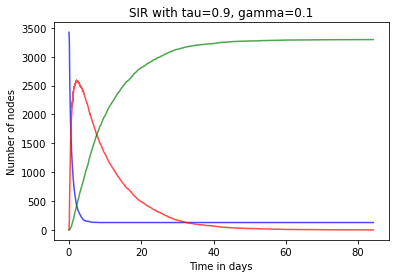

In [19]:
tau = 0.9   # transmission rate
gamma = 0.1 # recovery rate
initially_infected = 'WUH'


t, S, I, R = EoN.fast_SIR(G, tau, gamma, initially_infected)
plt.plot(t, S, color = 'b', alpha = 0.7)
plt.plot(t, I, color = 'r', alpha = 0.7)
plt.plot(t, R, color = 'g', alpha = 0.7)
plt.title(f'SIR with tau={tau}, gamma={gamma}')
plt.xlabel('Time in days')
plt.ylabel('Number of nodes')